In [1]:
#Import packages
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt

In [2]:
train = os.path.join('web/training_set')
test = os.path.join('web/test_set')

# directory with our training pictures
train_saree = os.path.join(train, 'saree')  
train_shirt = os.path.join(train, 'shirt')
train_tshirt = os.path.join(train, 'tshirt')

# directory with our test pictures
test_saree = os.path.join(test, 'saree')  
test_shirt = os.path.join(test, 'shirt')
test_tshirt = os.path.join(test, 'tshirt')

In [3]:
#Let's look at how many images are in the training and testing directory
saree_train = len(os.listdir(train_saree))
shirt_train = len(os.listdir(train_shirt))
tshirt_train = len(os.listdir(train_shirt))

saree_test = len(os.listdir(test_saree))
shirt_test = len(os.listdir(test_shirt))
tshirt_test = len(os.listdir(test_shirt))

total_train = saree_train + shirt_train + tshirt_train
total_val = saree_test + shirt_test + tshirt_test

print('total training saree images:', saree_train)
print('total training shirt images:', shirt_train)
print('total training tshirt images:', tshirt_train,'\n')

print('total test saree images:', saree_test)
print('total test shirt images:', shirt_test)
print('total test tshirt images:', tshirt_test,'\n')

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training saree images: 100
total training shirt images: 100
total training tshirt images: 100 

total test saree images: 20
total test shirt images: 20
total test tshirt images: 20 

Total training images: 300
Total validation images: 60


In [4]:
batch_size = 20
epochs = 15
IMG_HEIGHT = 300
IMG_WIDTH = 150

In [5]:
# Generator for our training data
train_image_generator = ImageDataGenerator(rescale=1./255)
# Generator for our test data
test_image_generator = ImageDataGenerator(rescale=1./255)

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 300 images belonging to 3 classes.


In [7]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 60 images belonging to 3 classes.


In [8]:
sample_training_images, _ = next(train_data_gen)

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

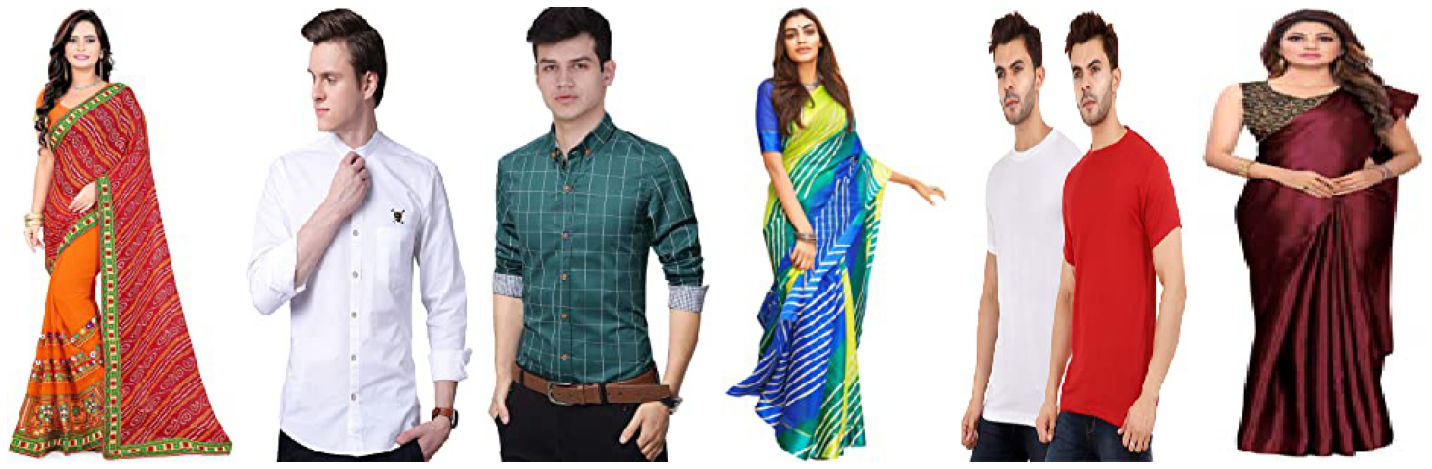

In [10]:
plotImages(sample_training_images[:6])

In [11]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.4),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [12]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
#Train the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 3 steps
Epoch 1/15
15/15 [==============================] - 9s 594ms/step - loss: 5.8379 - accuracy: 0.3367 - val_loss: 1.0284 - val_accuracy: 0.8167
Epoch 2/15
15/15 [==============================] - 8s 526ms/step - loss: 0.7075 - accuracy: 0.7367 - val_loss: 0.5501 - val_accuracy: 0.7833
Epoch 3/15
15/15 [==============================] - 8s 513ms/step - loss: 0.3467 - accuracy: 0.8733 - val_loss: 0.3429 - val_accuracy: 0.8833
Epoch 4/15
15/15 [==============================] - 8s 523ms/step - loss: 0.1921 - accuracy: 0.9233 - val_loss: 0.2904 - val_accuracy: 0.8833
Epoch 5/15
15/15 [==============================] - 8s 516ms/step - loss: 0.1171 - accuracy: 0.9633 - val_loss: 0.4788 - val_accuracy: 0.8500
Epoch 6/15
15/15 [==============================] - 8s 540ms/step - loss: 0.1088 - accuracy: 0.9600 - val_loss: 0.3284 - va

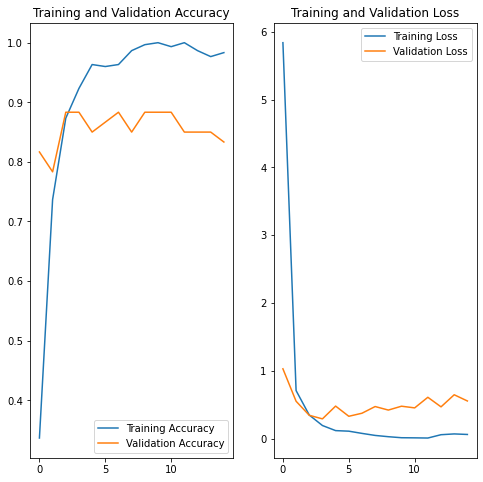

In [14]:
#Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()